In [53]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# 1. Import Data

### 1.1 UFO Data

In [8]:
df_ufo = pd.read_csv('Resources/ufo_data.csv', index_col=[0])
df_ufo.head()

,datetime,city,state,country,shape,duration (seconds),ufo_latitude,ufo_longitude,year
0,1949-10-10 20:30:00,San Marcos,TX,United States,cylinder,2700,29.883056,-97.941111,1949
1,1956-10-10 21:00:00,Edna,TX,United States,circle,20,28.978333,-96.645833,1956
2,1960-10-10 20:00:00,Kaneohe,HI,United States,light,900,21.418056,-157.803611,1960
3,1961-10-10 19:00:00,Bristol,TN,United States,sphere,300,36.595000,-82.188889,1961
4,1965-10-10 23:45:00,Norwalk,CT,United States,disk,1200,41.117500,-73.408333,1965


In [16]:
df_ufo['ufo'] = 1
df_ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67053 entries, 0 to 67052
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            67053 non-null  object 
 1   city                67053 non-null  object 
 2   state               67053 non-null  object 
 3   country             67053 non-null  object 
 4   shape               67053 non-null  object 
 5   duration (seconds)  67053 non-null  int64  
 6   ufo_latitude        67053 non-null  float64
 7   ufo_longitude       67053 non-null  float64
 8   year                67053 non-null  int64  
 9   ufo                 67053 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 5.6+ MB


In [18]:
df_ufo_2 = df_ufo[['year', 'ufo']]
print(df_ufo_2.shape)

(67053, 2)


In [40]:
df_ufo_2['year'].describe()

count    67053.000000
mean      2004.257602
std         10.283646
min       1910.000000
25%       2002.000000
50%       2007.000000
75%       2011.000000
max       2014.000000
Name: year, dtype: float64

### 1.2 Meteorite Data

In [11]:
df_meteorite = pd.read_csv('Resources/Meteorite_Landings.csv')
df_meteorite.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [14]:
#some rows have missing year values, they need to be dropped
df_meteorite_2 = df_meteorite.dropna()

In [17]:
df_meteorite_2 = df_meteorite_2.astype({'year': int}, errors='raise')
df_meteorite_2['meteorite'] = 1
df_meteorite_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38115 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   id           38115 non-null  int64  
 2   nametype     38115 non-null  object 
 3   recclass     38115 non-null  object 
 4   mass (g)     38115 non-null  float64
 5   fall         38115 non-null  object 
 6   year         38115 non-null  int64  
 7   latitude     38115 non-null  float64
 8   longitude    38115 non-null  float64
 9   GeoLocation  38115 non-null  object 
 10  meteorite    38115 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.5+ MB


In [19]:
df_meteorite_3 = df_meteorite_2[['year', 'meteorite']]
print(df_meteorite_3.shape)

(38115, 2)


In [28]:
df_meteorite_3['year'].describe()

count    38115.000000
mean      1989.993913
std         25.469892
min        860.000000
25%       1986.000000
50%       1996.000000
75%       2002.000000
max       2101.000000
Name: year, dtype: float64

In [31]:
#restrict date range to 1910 - 2023
df_meteorite_4 = df_meteorite_3.loc[(df_meteorite_3['year']>=1910)&(df_meteorite_3['year']<=2023)]
print(df_meteorite_4.shape)

(37272, 2)


### 1.3 Fireball Data

In [20]:
df_fireball = pd.read_csv('Resources/Longer_Fireball_Data.csv')
df_fireball.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-04-01 00:02:03,16.8S,76.0E,61.8,46.4,21.4,-40.6,7.1,2.400000e+10,0.086
1,2023-03-20 06:53:23,23.7S,132.6E,34.8,NaN,NaN,NaN,NaN,2.700000e+10,0.095
2,2023-03-11 08:21:28,74.7S,79.5E,32.0,NaN,NaN,NaN,NaN,4.440000e+11,1.100
3,2023-03-03 02:53:54,40.1N,87.4E,32.0,25.3,16.1,-19.3,2.6,6.400000e+10,0.200
4,2023-02-19 06:15:34,7.9N,109.9E,37.0,23.0,-1.1,-22.9,1.2,2.030000e+11,0.570


In [22]:
df_fireball['Peak Brightness Date/Time (UT)'] = pd.to_datetime(df_fireball['Peak Brightness Date/Time (UT)'])
df_fireball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Peak Brightness Date/Time (UT)       951 non-null    datetime64[ns]
 1   Latitude (deg.)                      761 non-null    object        
 2   Longitude (deg.)                     761 non-null    object        
 3   Altitude (km)                        493 non-null    float64       
 4   Velocity (km/s)                      288 non-null    float64       
 5   vx                                   288 non-null    float64       
 6   vy                                   288 non-null    float64       
 7   vz                                   288 non-null    float64       
 8   Total Radiated Energy (J)            951 non-null    float64       
 9   Calculated Total Impact Energy (kt)  951 non-null    float64       
dtypes: datetime64[

In [24]:
df_fireball['year'] = pd.DatetimeIndex(df_fireball['Peak Brightness Date/Time (UT)']).year
df_fireball['fireball'] = 1
df_fireball.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),year,fireball
0,2023-04-01 00:02:03,16.8S,76.0E,61.8,46.4,21.4,-40.6,7.1,2.400000e+10,0.086,2023,1
1,2023-03-20 06:53:23,23.7S,132.6E,34.8,NaN,NaN,NaN,NaN,2.700000e+10,0.095,2023,1
2,2023-03-11 08:21:28,74.7S,79.5E,32.0,NaN,NaN,NaN,NaN,4.440000e+11,1.100,2023,1
3,2023-03-03 02:53:54,40.1N,87.4E,32.0,25.3,16.1,-19.3,2.6,6.400000e+10,0.200,2023,1
4,2023-02-19 06:15:34,7.9N,109.9E,37.0,23.0,-1.1,-22.9,1.2,2.030000e+11,0.570,2023,1


In [26]:
df_fireball_2 = df_fireball[['year', 'fireball']]
print(df_fireball_2.shape)

(951, 2)


In [27]:
df_fireball_2['year'].describe()

count     951.000000
mean     2009.319664
std         8.212623
min      1988.000000
25%      2003.000000
50%      2009.000000
75%      2016.000000
max      2023.000000
Name: year, dtype: float64

# 2. Create Year Array (1910 - 2023)

In [32]:
years = []
x = 1910
while x < 2024:
    years.append(x)
    x +=1

In [38]:
df_years = pd.DataFrame(years)
df_years = df_years.rename(columns={0:'year'})
df_years.head()

,year
0,1910
1,1911
2,1912
3,1913
4,1914


# 3. Sighting Counts by Year

### 3.1 UFO

In [44]:
df_ufo_by_year = df_ufo_2.groupby('year').sum().reset_index()
df_ufo_by_year = df_ufo_by_year.sort_values('year', ascending = True)
df_ufo_by_year.head()

,year,ufo
0,1910,2
1,1920,1
2,1925,1
3,1929,1
4,1930,1


In [46]:
df_ufo_by_year = df_ufo_by_year.rename(columns={'ufo':'ufo_sightings'})

### 3.2 Meteorite

In [45]:
df_meteorite_by_year = df_meteorite_4.groupby('year').sum().reset_index()
df_meteorite_by_year = df_meteorite_by_year.sort_values('year', ascending = True)
df_meteorite_by_year.head()

,year,meteorite
0,1910,19
1,1911,11
2,1912,12
3,1913,11
4,1914,18


In [47]:
df_meteorite_by_year = df_meteorite_by_year.rename(columns={'meteorite':'meteorite_sightings'})

### 3.3 Fireball

In [48]:
df_fireball_by_year = df_fireball_2.groupby('year').sum().reset_index()
df_fireball_by_year = df_fireball_by_year.sort_values('year', ascending = True)
df_fireball_by_year.head()

,year,fireball
0,1988,1
1,1990,1
2,1991,1
3,1993,2
4,1994,13


In [49]:
df_fireball_by_year = df_fireball_by_year.rename(columns={'fireball':'fireball_sightings'})

# 4. Join to Years

In [51]:
df_all = pd.merge(df_years, df_ufo_by_year, how='left')
df_all = pd.merge(df_all, df_meteorite_by_year, how='left')
df_all = pd.merge(df_all, df_fireball_by_year, how='left')
df_all.head()

,year,ufo_sightings,meteorite_sightings,fireball_sightings
0,1910,2.0,19.0,NaN
1,1911,NaN,11.0,NaN
2,1912,NaN,12.0,NaN
3,1913,NaN,11.0,NaN
4,1914,NaN,18.0,NaN


In [52]:
df_all['ufo_sightings'] = np.where(df_all['ufo_sightings'].isna(), 0, df_all['ufo_sightings'])
df_all['meteorite_sightings'] = np.where(df_all['meteorite_sightings'].isna(), 0, df_all['meteorite_sightings'])
df_all['fireball_sightings'] = np.where(df_all['fireball_sightings'].isna(), 0, df_all['fireball_sightings'])
df_all.head()

,year,ufo_sightings,meteorite_sightings,fireball_sightings
0,1910,2.0,19.0,0.0
1,1911,0.0,11.0,0.0
2,1912,0.0,12.0,0.0
3,1913,0.0,11.0,0.0
4,1914,0.0,18.0,0.0


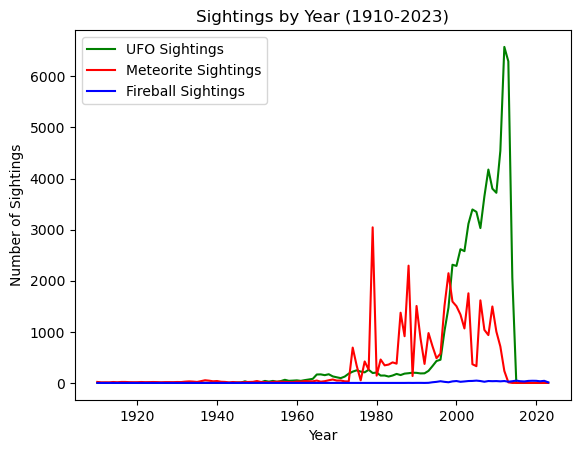

In [56]:
plt.plot(df_all['year'], df_all['ufo_sightings'], color="green", label='UFO Sightings')
plt.plot(df_all['year'], df_all['meteorite_sightings'], color="red", label='Meteorite Sightings')
plt.plot(df_all['year'], df_all['fireball_sightings'], color="blue", label='Fireball Sightings')

plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('Sightings by Year (1910-2023)')

plt.legend()
plt.show()

In [57]:
df_all.to_json('Resources/sightings_by_year.json', orient='index')